In [13]:
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
import vapeplot

import warnings
warnings.filterwarnings('ignore')

vapeplot.set_palette('avanti')
plt.rc('axes', grid=False, facecolor="white")
plt.rcParams.update({'font.size': 18})

In [2]:
path_data = "../../training_results/dna_binding/ml_classic/"
list_documents = os.listdir(path_data)

In [3]:
list_df = []

for element in list_documents:
    df_data = pd.read_csv(f"{path_data}{element}")

    name_values = element.split("_exploring")[0]
    df_data['encoder'] = name_values

    list_df.append(df_data)

df_results = pd.concat(list_df, axis=0)
df_results

,description,test_accuracy,test_f1_score,test_precision,test_recall,fit_time,score_time,train_f1_weighted,train_recall_weighted,train_precision_weighted,train_accuracy,iteration,encoder
0,KNeighborsClassifier,0.913330,0.913295,0.914032,0.913330,0.633372,26.640990,0.905199,0.905239,0.905916,0.905239,1,prottrans_albert
1,DecisionTreeClassifier,0.780846,0.780845,0.780858,0.780846,215.128609,0.053093,0.782100,0.782106,0.782140,0.782106,1,prottrans_albert
2,BaggingClassifier,0.863780,0.863566,0.866025,0.863780,1386.880762,0.509322,0.852659,0.852846,0.854661,0.852846,1,prottrans_albert
3,RandomForestClassifier,0.902526,0.902518,0.902644,0.902526,164.032624,0.299289,0.897461,0.897476,0.897716,0.897476,1,prottrans_albert
4,ExtraTreesClassifier,0.906344,0.906334,0.906499,0.906344,27.011305,0.359795,0.898953,0.898973,0.899305,0.898973,1,prottrans_albert
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,BaggingClassifier,0.765900,0.765693,0.767325,0.765900,142.271298,0.080199,0.759968,0.760244,0.761252,0.760244,4,word2vec
3,RandomForestClassifier,0.808708,0.808450,0.809899,0.808708,52.900374,0.151533,0.798246,0.798468,0.800007,0.798468,4,word2vec
4,ExtraTreesClassifier,0.811957,0.811659,0.813418,0.811957,9.863767,0.178897,0.801645,0.801845,0.803278,0.801845,4,word2vec
5,AdaBoostClassifier,0.731622,0.731414,0.732030,0.731622,80.505616,0.171813,0.730352,0.730479,0.731042,0.730479,4,word2vec


In [4]:
df_results_train = df_results[['description', 'train_f1_weighted',
       'train_recall_weighted', 'train_precision_weighted', 'train_accuracy',
       'iteration', 'encoder']]

df_results_train.columns = ["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]
df_results_train['Stage'] = "Training"

df_results_test = df_results[['description', 'test_accuracy', 'test_f1_score', 'test_precision',
       'test_recall', 'iteration', 'encoder']]

df_results_test.columns = ["Algorithm", "Accuracy", "F1", "Precision", "Recall", "Iteration", "Encoder"]
df_results_test['Stage'] = "Validating"

df_concat = pd.concat([df_results_train, df_results_test], axis=0)
df_concat

,Algorithm,F1,Recall,Precision,Accuracy,Iteration,Encoder,Stage
0,KNeighborsClassifier,0.905199,0.905239,0.905916,0.905239,1,prottrans_albert,Training
1,DecisionTreeClassifier,0.782100,0.782106,0.782140,0.782106,1,prottrans_albert,Training
2,BaggingClassifier,0.852659,0.852846,0.854661,0.852846,1,prottrans_albert,Training
3,RandomForestClassifier,0.897461,0.897476,0.897716,0.897476,1,prottrans_albert,Training
4,ExtraTreesClassifier,0.898953,0.898973,0.899305,0.898973,1,prottrans_albert,Training
...,...,...,...,...,...,...,...,...
2,BaggingClassifier,0.765693,0.765900,0.767325,0.765900,4,word2vec,Validating
3,RandomForestClassifier,0.808450,0.808708,0.809899,0.808708,4,word2vec,Validating
4,ExtraTreesClassifier,0.811659,0.811957,0.813418,0.811957,4,word2vec,Validating
5,AdaBoostClassifier,0.731414,0.731622,0.732030,0.731622,4,word2vec,Validating


In [17]:
df_concat.describe()

,F1,Recall,Precision,Accuracy,Iteration
count,5502.000000,5502.000000,5502.000000,5502.000000,5502.000000
mean,0.832958,0.833077,0.833907,0.833077,15.994911
std,0.065675,0.065617,0.065508,0.065617,9.697027
min,0.690621,0.690683,0.690797,0.690683,0.000000
25%,0.786645,0.786836,0.788117,0.786836,8.000000
50%,0.821681,0.821785,0.822513,0.821785,16.000000
75%,0.892698,0.892860,0.894553,0.892860,23.000000
max,0.942973,0.942978,0.943192,0.942978,42.000000


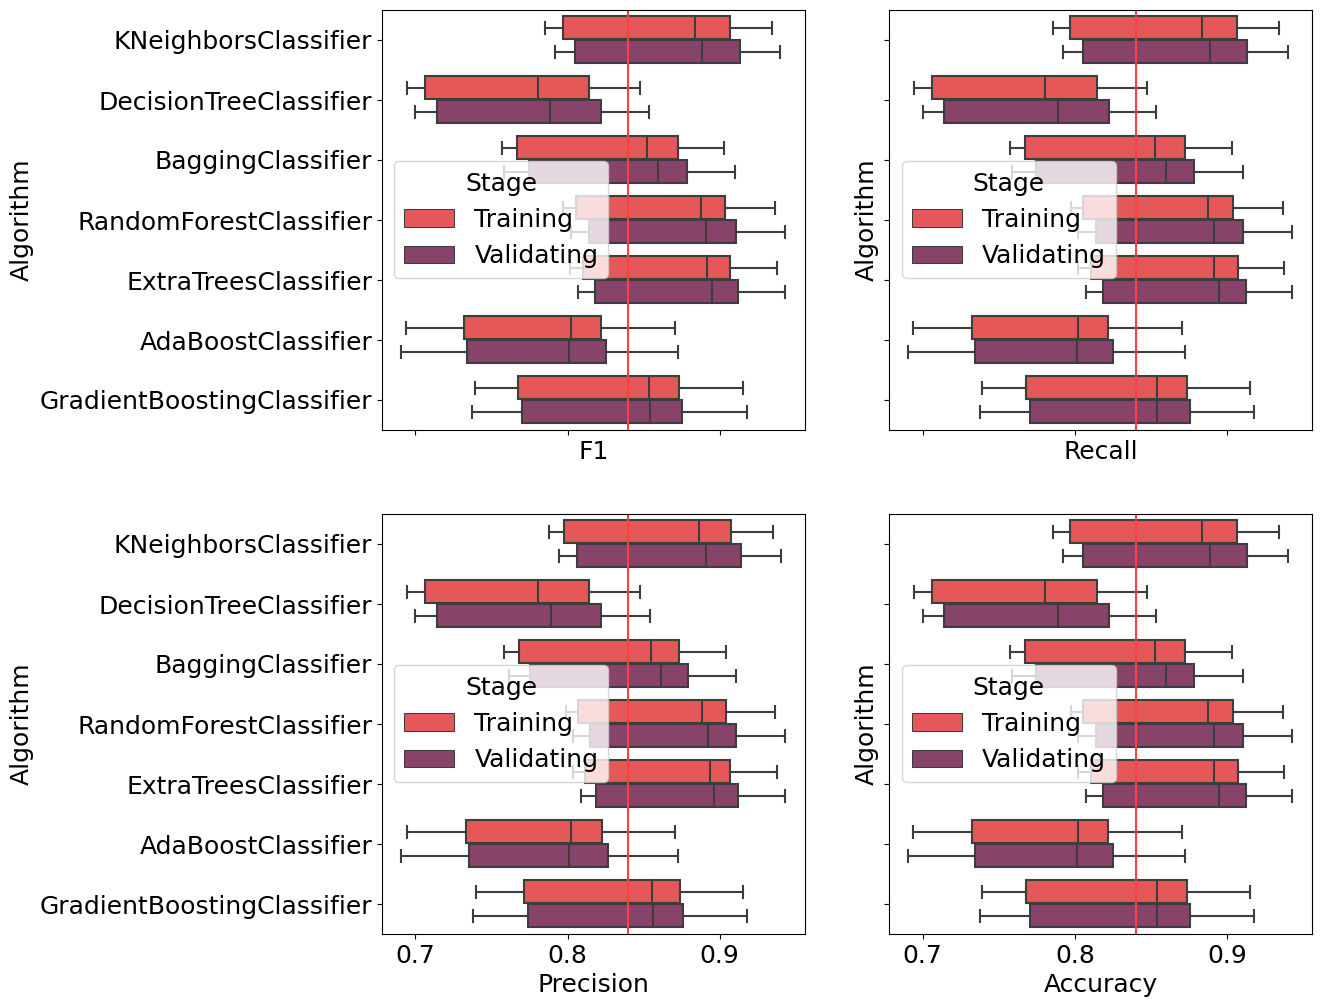

In [18]:
fig, axes = plt.subplots(2,2, figsize=(12,12), sharex=True, sharey=True)

ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Algorithm")

ax1.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Algorithm")

ax2.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Algorithm")

ax3.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Algorithm")

ax4.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

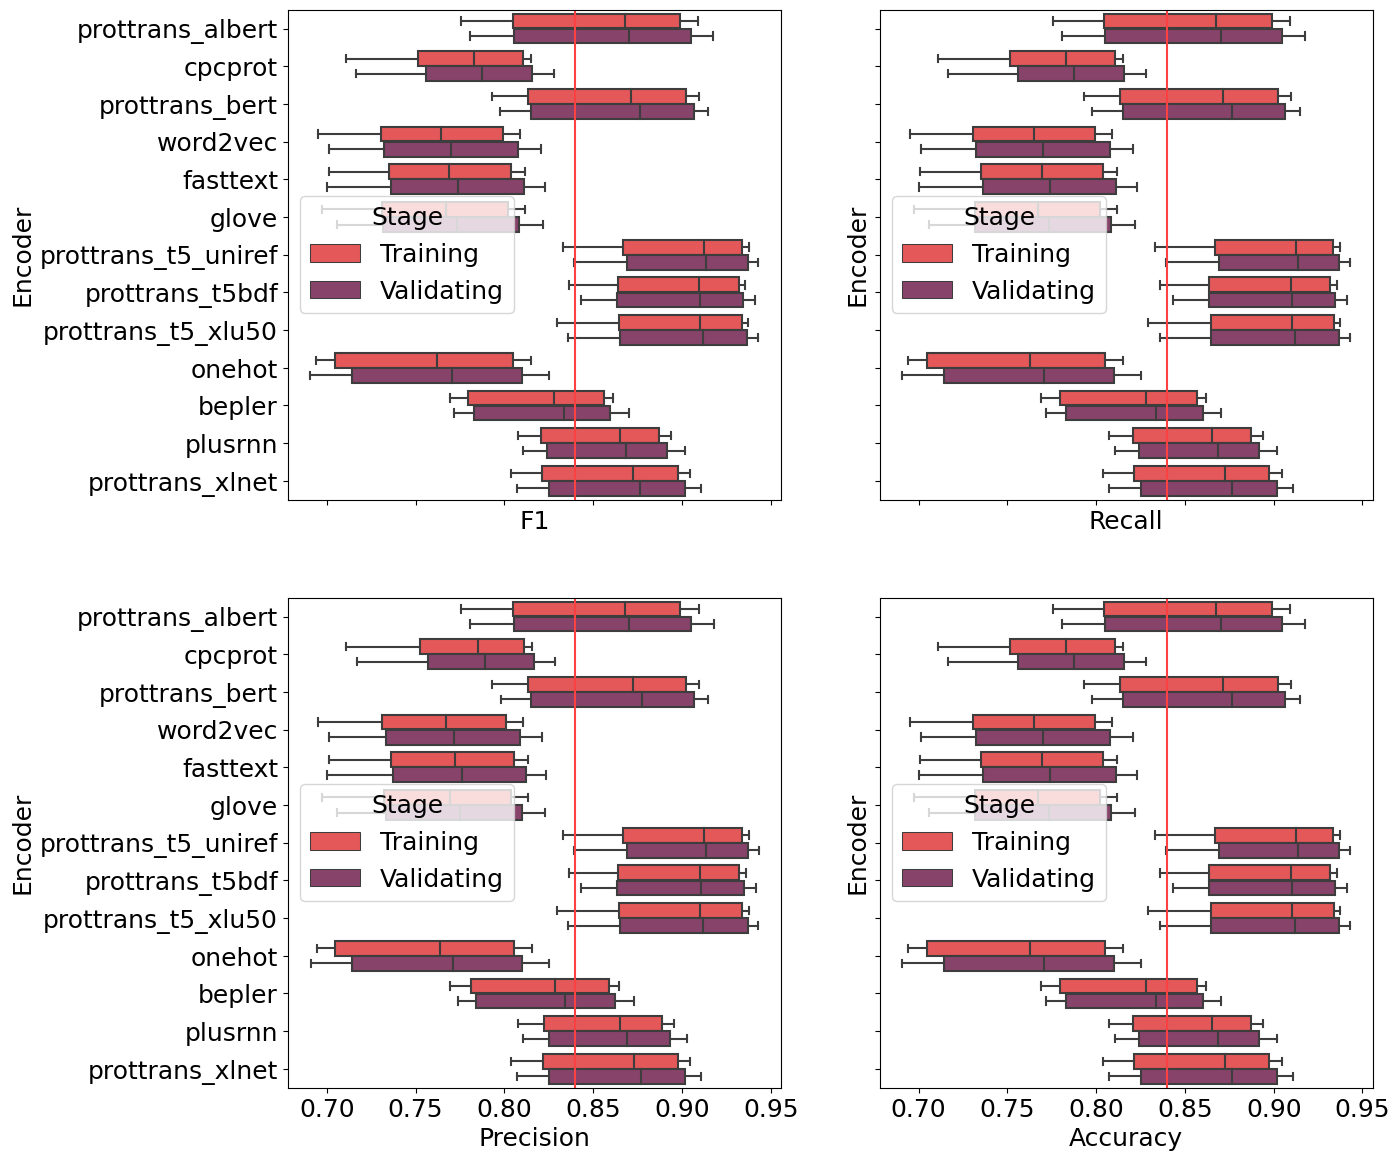

In [22]:
fig, axes = plt.subplots(2,2, figsize=(14,14), sharex=True, sharey=True)

ax1 = sns.boxplot(ax=axes[0][0], data=df_concat, x="F1", hue="Stage", y="Encoder")
ax2 = sns.boxplot(ax=axes[0][1], data=df_concat, x="Recall", hue="Stage", y="Encoder")
ax3 = sns.boxplot(ax=axes[1][0], data=df_concat, x="Precision", hue="Stage", y="Encoder")
ax4 = sns.boxplot(ax=axes[1][1], data=df_concat, x="Accuracy", hue="Stage", y="Encoder")

ax1.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax2.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax3.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

ax4.axvline(x = 0.84,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) # Top of the plot

In [23]:
std_grouped_data_training = df_results_train[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).std()
std_grouped_data_testing = df_results_test[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).std()


In [25]:
import numpy as np

filter_std_accuracy_training = np.quantile(std_grouped_data_training['Accuracy'], .1)
filter_std_precision_training = np.quantile(std_grouped_data_training['Precision'], .1)
filter_std_recall_training = np.quantile(std_grouped_data_training['Recall'], .1)
filter_std_f_score_training = np.quantile(std_grouped_data_training['F1'], .1)

filter_std_accuracy_testing = np.quantile(std_grouped_data_testing['Accuracy'], .1)
filter_std_precision_testing = np.quantile(std_grouped_data_testing['Precision'], .1)
filter_std_recall_testing = np.quantile(std_grouped_data_testing['Recall'], .1)
filter_std_f_score_testing = np.quantile(std_grouped_data_testing['F1'], .1)

In [26]:
std_grouped_data_training["Accuray_cat_std"] = (std_grouped_data_training["Accuracy"] <= filter_std_accuracy_training).astype(int)
std_grouped_data_training["Precision_cat_std"] = (std_grouped_data_training["Precision"] <= filter_std_precision_training).astype(int)
std_grouped_data_training["Recall_cat_std"] = (std_grouped_data_training["Recall"] <= filter_std_recall_training).astype(int)
std_grouped_data_training["F-score_cat_std"] = (std_grouped_data_training["F1"] <= filter_std_f_score_training).astype(int)

std_grouped_data_testing["Accuray_cat_std"] = (std_grouped_data_testing["Accuracy"] <= filter_std_accuracy_testing).astype(int)
std_grouped_data_testing["Precision_cat_std"] = (std_grouped_data_testing["Precision"] <= filter_std_precision_testing).astype(int)
std_grouped_data_testing["Recall_cat_std"] = (std_grouped_data_testing["Recall"] <= filter_std_recall_testing).astype(int)
std_grouped_data_testing["F-score_cat_std"] = (std_grouped_data_testing["F1"] <= filter_std_f_score_testing).astype(int)


In [27]:
mean_grouped_data_training = df_results_train[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).mean()
mean_grouped_data_testing = df_results_test[["Algorithm", "F1", "Recall", "Precision", "Accuracy", "Iteration", "Encoder"]].groupby(by=["Algorithm", "Encoder"]).mean()

filter_mean_accuracy_training = np.quantile(mean_grouped_data_training['Accuracy'], .9)
filter_mean_precision_training = np.quantile(mean_grouped_data_training['Precision'], .9)
filter_mean_recall_training = np.quantile(mean_grouped_data_training['Recall'], .9)
filter_mean_f_score_training = np.quantile(mean_grouped_data_training['F1'], .9)

filter_mean_accuracy_testing = np.quantile(mean_grouped_data_testing['Accuracy'], .9)
filter_mean_precision_testing = np.quantile(mean_grouped_data_testing['Precision'], .9)
filter_mean_recall_testing = np.quantile(mean_grouped_data_testing['Recall'], .9)
filter_mean_f_score_testing = np.quantile(mean_grouped_data_testing['F1'], .9)

mean_grouped_data_training["Accuray_cat_mean"] = (mean_grouped_data_training["Accuracy"] >= filter_mean_accuracy_training).astype(int)
mean_grouped_data_training["Precision_cat_mean"] = (mean_grouped_data_training["Precision"] >= filter_mean_precision_training).astype(int)
mean_grouped_data_training["Recall_cat_mean"] = (mean_grouped_data_training["Recall"] >= filter_mean_recall_training).astype(int)
mean_grouped_data_training["F-score_cat_mean"] = (mean_grouped_data_training["F1"] >= filter_mean_f_score_training).astype(int)

mean_grouped_data_testing["Accuray_cat_mean"] = (mean_grouped_data_testing["Accuracy"] >= filter_mean_accuracy_testing).astype(int)
mean_grouped_data_testing["Precision_cat_mean"] = (mean_grouped_data_testing["Precision"] >= filter_mean_precision_testing).astype(int)
mean_grouped_data_testing["Recall_cat_mean"] = (mean_grouped_data_testing["Recall"] >= filter_mean_recall_testing).astype(int)
mean_grouped_data_testing["F-score_cat_mean"] = (mean_grouped_data_testing["F1"] >= filter_mean_f_score_testing).astype(int)


In [28]:
matrix_data = []

for index in mean_grouped_data_training.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = mean_grouped_data_training['Accuray_cat_mean'][index]
    f_score_value = mean_grouped_data_training['F-score_cat_mean'][index]
    precision_value = mean_grouped_data_training['Precision_cat_mean'][index]
    recall_value = mean_grouped_data_training['Recall_cat_mean'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_mean_training = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "mean_accuracy_training", "mean_f_score_training", "mean_precision_training", "mean_recall_training"])
df_process_mean_training

,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,fasttext,0,0,0,0
3,AdaBoostClassifier,glove,0,0,0,0
4,AdaBoostClassifier,onehot,0,0,0,0
...,...,...,...,...,...,...
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1
87,RandomForestClassifier,prottrans_t5_xlu50,1,1,1,1
88,RandomForestClassifier,prottrans_t5bdf,1,1,1,1
89,RandomForestClassifier,prottrans_xlnet,0,0,0,0


In [29]:
matrix_data = []

for index in mean_grouped_data_testing.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = mean_grouped_data_testing['Accuray_cat_mean'][index]
    f_score_value = mean_grouped_data_testing['F-score_cat_mean'][index]
    precision_value = mean_grouped_data_testing['Precision_cat_mean'][index]
    recall_value = mean_grouped_data_testing['Recall_cat_mean'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_mean_testing = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "mean_accuracy_testing", "mean_f_score_testing", "mean_precision_testing", "mean_recall_testing"])
df_process_mean_testing

,Algorithm,Encoder,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,fasttext,0,0,0,0
3,AdaBoostClassifier,glove,0,0,0,0
4,AdaBoostClassifier,onehot,0,0,0,0
...,...,...,...,...,...,...
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1
87,RandomForestClassifier,prottrans_t5_xlu50,1,1,1,1
88,RandomForestClassifier,prottrans_t5bdf,1,1,1,1
89,RandomForestClassifier,prottrans_xlnet,0,0,0,0


In [30]:
matrix_data = []

for index in std_grouped_data_training.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = std_grouped_data_training['Accuray_cat_std'][index]
    f_score_value = std_grouped_data_training['F-score_cat_std'][index]
    precision_value = std_grouped_data_training['Precision_cat_std'][index]
    recall_value = std_grouped_data_training['Recall_cat_std'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_std_training = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "std_accuracy_training", "std_f_score_training", "std_precision_training", "std_recall_training"])
df_process_std_training

,Algorithm,Encoder,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,fasttext,0,0,0,0
3,AdaBoostClassifier,glove,0,0,0,0
4,AdaBoostClassifier,onehot,0,0,0,0
...,...,...,...,...,...,...
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1
87,RandomForestClassifier,prottrans_t5_xlu50,1,1,1,1
88,RandomForestClassifier,prottrans_t5bdf,0,0,0,0
89,RandomForestClassifier,prottrans_xlnet,0,0,0,0


In [31]:
matrix_data = []

for index in std_grouped_data_testing.index:
    algorithm = index[0]
    encoding = index[1]

    accuracy_value = std_grouped_data_testing['Accuray_cat_std'][index]
    f_score_value = std_grouped_data_testing['F-score_cat_std'][index]
    precision_value = std_grouped_data_testing['Precision_cat_std'][index]
    recall_value = std_grouped_data_testing['Recall_cat_std'][index]
    
    row = [algorithm, encoding, accuracy_value, f_score_value, precision_value, recall_value]
    matrix_data.append(row)

df_process_std_testing = pd.DataFrame(matrix_data, columns=["Algorithm", "Encoder", "std_accuracy_testing", "std_f_score_testing", "std_precision_testing", "std_recall_testing"])
df_process_std_testing

,Algorithm,Encoder,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing
0,AdaBoostClassifier,bepler,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0
2,AdaBoostClassifier,fasttext,0,0,0,0
3,AdaBoostClassifier,glove,0,0,0,0
4,AdaBoostClassifier,onehot,0,0,0,0
...,...,...,...,...,...,...
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1
87,RandomForestClassifier,prottrans_t5_xlu50,0,0,0,0
88,RandomForestClassifier,prottrans_t5bdf,1,1,1,1
89,RandomForestClassifier,prottrans_xlnet,0,0,0,0


In [32]:
df_merge = df_process_mean_training.merge(right=df_process_mean_testing, on=["Algorithm", "Encoder"])
df_merge = df_merge.merge(right=df_process_std_testing, on=["Algorithm", "Encoder"])
df_merge = df_merge.merge(right=df_process_std_training, on=["Algorithm", "Encoder"])
df_merge


,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training
0,AdaBoostClassifier,bepler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,AdaBoostClassifier,cpcprot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,AdaBoostClassifier,fasttext,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,AdaBoostClassifier,glove,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,AdaBoostClassifier,onehot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
87,RandomForestClassifier,prottrans_t5_xlu50,1,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1
88,RandomForestClassifier,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0
89,RandomForestClassifier,prottrans_xlnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df_merge['Voting'] = df_merge.sum(axis=1, numeric_only=True)
df_merge.sort_values(by="Voting", ascending=False)

,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training,Voting
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
60,GradientBoostingClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
49,ExtraTreesClassifier,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
47,ExtraTreesClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
73,KNeighborsClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,DecisionTreeClassifier,cpcprot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26,DecisionTreeClassifier,bepler,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25,BaggingClassifier,word2vec,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24,BaggingClassifier,prottrans_xlnet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
df_merge[df_merge['Voting']>12]

,Algorithm,Encoder,mean_accuracy_training,mean_f_score_training,mean_precision_training,mean_recall_training,mean_accuracy_testing,mean_f_score_testing,mean_precision_testing,mean_recall_testing,std_accuracy_testing,std_f_score_testing,std_precision_testing,std_recall_testing,std_accuracy_training,std_f_score_training,std_precision_training,std_recall_training,Voting
47,ExtraTreesClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
49,ExtraTreesClassifier,prottrans_t5bdf,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
60,GradientBoostingClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
73,KNeighborsClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
86,RandomForestClassifier,prottrans_t5_uniref,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,16
